# DSCI471 Exploratory Data Analysis Graph data
Harry Zhao, Yi Pan, Yantian Ding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./new_centrality.csv")
df = df.drop(["Unnamed: 0", "key_0", "Unnamed: 0.1"], axis=1)

## Graph

By using the JOSM editor, we have generated the respectively network on real New York City map, like following:

![unknown.png](./vis_OSM.png)

By distributing the data points on the map, the selected road sections basically cover the busy areas of Manhattan, Brooklyn and other parts of New York, which is of high practical significance.

We also observe that there are still some roads in our selected subgraphs that are located in relatively remote locations, and they may be relatively outliers for the prediction task as well as for the dataset itself.

## Classify the speed data

According to Level of Service (LOS) with Average Speed and Traffic Conditions for Arterial Roads<sup>[1]</sup>, we can calculate the specific banner value amoung different classes

- [33.80259, ∞): Unblocked
- [20.87807, 33.80259): Mild Congestion
- [15.9071, 20.87807): Moderate Congestion
- [0, 15.9071): Serioous Congestion


In [4]:
df2 = df.copy()
df2['class'] = df2.apply(lambda x: "Unblocked" if x.speed>33.80259 
                         else ("Mild Congestion" if x.speed>20.87807 
                               else ("Moderate Congestion" if x.speed>15.9071 
                                     else "Serious Congestion")), axis=1)

(array([ 5273., 10683.,  3729.,  2262.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

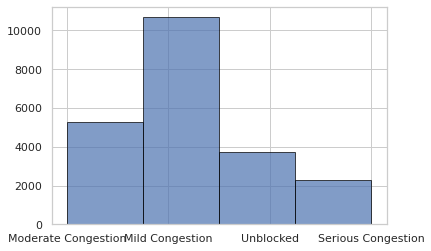

In [5]:
sns.set(style="whitegrid")
plt.hist(df2['class'], bins=4, edgecolor="black", alpha=0.7)

The bar chart shows that New York City is mildly congested and above in the majority of cases, and mildly congested most of the time.

## Centrality

In [6]:
df

,speed,degree,closeness,betweenness,vector
0,18.663870,0.000091,0.009143,0.000456,9.259314e-29
1,31.384090,0.000091,0.013311,0.001449,2.482134e-12
2,21.989820,0.000137,0.009479,0.000352,2.061054e-19
3,22.780450,0.000182,0.015880,0.000093,1.863432e-07
4,20.012649,0.000137,0.015545,0.000059,5.190714e-08
...,...,...,...,...,...
21942,32.606324,0.000228,0.013491,0.000083,6.244247e-11
21943,28.106050,0.000137,0.012866,0.000121,2.473512e-09
21944,35.390696,0.000182,0.012951,0.000149,4.864931e-09
21945,39.951871,0.000182,0.012112,0.000107,1.551051e-08


### Degree Centrality

Degree centrality is the most direct metric for portraying node centrality in network analysis. A larger degree value of a node means a higher degree centrality of the whole node, and the more important the node is in the whole network. According to the defination given by Newman (2010), in this project, the fomular of degree centrality is:
$$
C_{D}(j)=\sum_{j=1}^{n} A_{i j}
$$


(array([7081., 5232., 5171., 2294., 2065.,   86.,   18.]),
 array([4.55663902e-05, 9.76422648e-05, 1.49718139e-04, 2.01794014e-04,
        2.53869888e-04, 3.05945763e-04, 3.58021638e-04, 4.10097512e-04]),
 <a list of 7 Patch objects>)

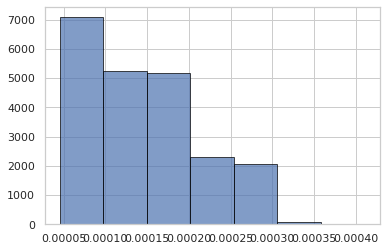

In [7]:
plt.hist(df2['degree'], bins=7, edgecolor="black", alpha=0.7)

This figure shows that the degree centrality of our selected waypoints is concentrated in the interval of 0-0.0003. It can be seen that a single point, alone, is not important in the whole road network we have selected

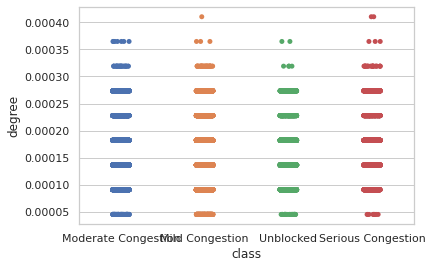

In [8]:
sns.stripplot(x="class",y="degree", data=df2)
plt.show()

This figure shows that the degree centrality in all four classes are distributed uniformly but discontinuously. The value of degree centrality are all small cause of we have selected more than 20000 points and the hightest degree centrality for a single point is 9.

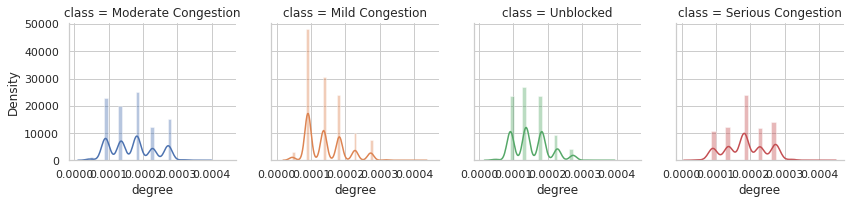

In [9]:
grid = sns.FacetGrid(df2[['degree', 'class']], col='class', hue='class', col_wrap=4)
grid.map(sns.distplot, 'degree')

This figure shows that the degree centrality of four classes is discrete in the interval of 0-0.0004. Meanwhile, in each graph, most of the points are concentrated in 5 bins.

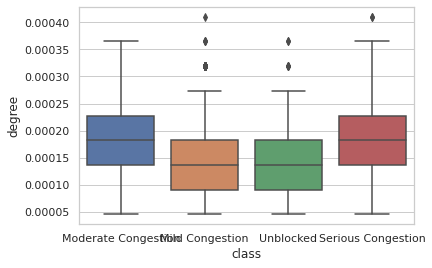

In [10]:
sns.boxplot(x="class", y="degree", data=df2);

This figure shows that the mean degree centrality is higher under Moderate Congestion and Serious Congestion, while it is lower under Mild Congestion and Unlocked. Similarly, the range of data under Moderate Congestion and Serious Congestion is larger than that of Mild Congestion and Unblocked

The degree centrality graph shows that nodes with high degree centrality tend to be moderately and heavily congested roads; nodes with low degree centrality tend to be lightly congested and clear roads. This is consistent with our general intuition that intersections tend to be more congested than non-intersections.

### Betweenness Centrality

Betweenness centrality describes the ratio of the number of times a node acts as a bridge for the shortest path between two other nodes to the number of short paths in the network graph. According to the definition given by Everett adn Borgatti (1999), Betweenness centrality is calculated as:
$$
g(v)=\sum_{s \neq v \neq t} \frac{\sigma_{s t}(v)}{\sigma_{s t}}
$$

(array([2.1547e+04, 2.4500e+02, 1.0900e+02, 2.1000e+01, 2.5000e+01]),
 array([0.        , 0.03574565, 0.0714913 , 0.10723695, 0.1429826 ,
        0.17872825]),
 <a list of 5 Patch objects>)

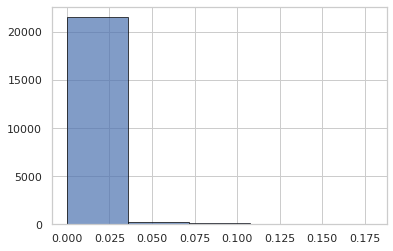

In [11]:
plt.hist(df2['betweenness'], bins=5, edgecolor="black", alpha=0.7)

This figure shows that the betweenness centrality of our selected nodes are low. It is concentrated in the range of 0-0.025

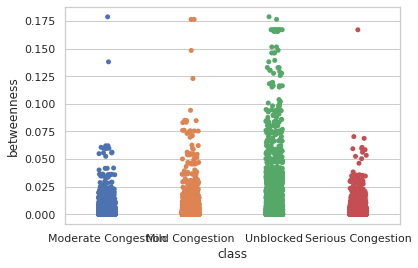

In [12]:
sns.stripplot(x="class",y="betweenness", data=df2)
plt.show()

This figure shows that the Betweenness Centrality of all points in each class is concentrated at the low value. However, except for the Unblocked class, the shape of the distribution of all classes are more "extreme" (when betweenness Centrality >0.1, the distribution is sparse for all three classes except for the Unblocked class). And as congestion level increases, the distribution of betweenness centrality becomes more concentrated.

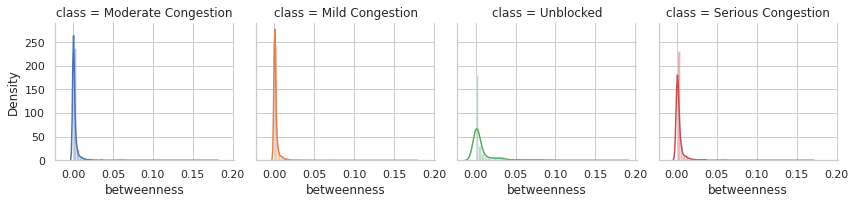

In [13]:
grid = sns.FacetGrid(df2[['betweenness', 'class']], col='class', hue='class', col_wrap=4)
grid.map(sns.distplot, 'betweenness')

This figure shows that the density trends of the four velocity regions are roughly the same, and the data are concentrated in the interval of 0-0.05, but the distribution of betweenness centrality of Unblocked is flatter, and the distribution of the remaining three categories is more concentrated

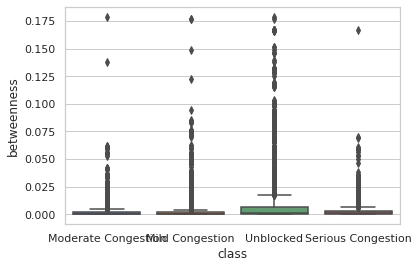

In [14]:
sns.boxplot(x="class", y="betweenness", data=df2);

This figure shows that the upper limit of betweenness centrality in all the classes are close to 0, except for the unblocked class, which has the highest upper limit value at about 0.02. And also, the unblocked class have a wider distribution range.

From the graphs related to betweenness Centrality, we can see that the nodes with higher betweenness centrality tend to have higher speed. From the graphs, we can see that the unblocked area has the widest betweenness Centrality distribution among the four areas.  According to the literature [2], it is known that this is because "usually the more accessible roads are generally far away from the city center", which means The further away from the city center the nodes are, the higher its betweenness Centrality. This also fits our intuition, the road network in suburban areas is not dense, so that road points in suburban areas tend to act as the only "bridge" between neighboring road sections. 

### Closeness Centrality

Closeness Centrality reflects the proximity of a node to other nodes. If a waypoint is relatively close to all other waypoints, then the traffic speed of this waypoint is not too constrained by the other waypoints. It also captures the notion of accessibility of a place at the city scale<sup>[3]</sup>. According to the definition of Newman (2001), the formula for Closeness centrality is:
$$
C(x)=\frac{1}{\sum_{y} d(y, x)}
$$

(array([  40.,  127.,  310.,  230.,  345.,  495.,  785., 1163., 1297.,
        1658., 1857., 2221., 2239., 2305., 2016., 1735., 1388.,  976.,
         485.,  275.]),
 array([0.00612163, 0.00669428, 0.00726693, 0.00783958, 0.00841222,
        0.00898487, 0.00955752, 0.01013017, 0.01070282, 0.01127547,
        0.01184811, 0.01242076, 0.01299341, 0.01356606, 0.01413871,
        0.01471136, 0.01528401, 0.01585665, 0.0164293 , 0.01700195,
        0.0175746 ]),
 <a list of 20 Patch objects>)

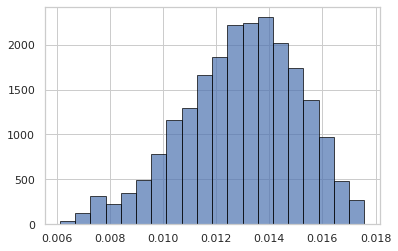

In [15]:
plt.hist(df2['closeness'], bins=20, edgecolor="black", alpha=0.7)

From this figure, it can be seen that the overall Closeness centrality distribution is right-skewed. and the peaks are concentrated in the range of 0.013-0.015

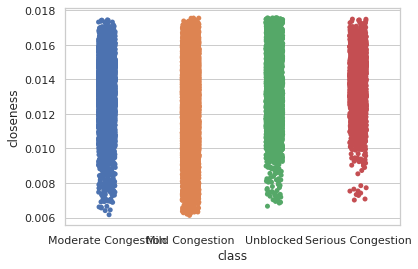

In [16]:
sns.stripplot(x="class",y="closeness", data=df2)
plt.show()

From this figure, we can see that as the congestion increases, the lower bound of the concentration range in different classes becomes higher and higher. The only exception is the unblocked region, which still has a high lower bound on the concentration range despite the low congestion level


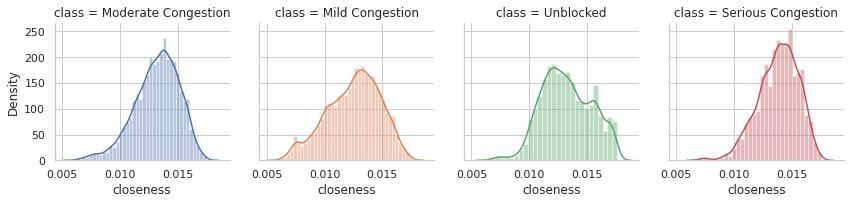

In [17]:
grid = sns.FacetGrid(df2[['closeness', 'class']], col='class', hue='class', col_wrap=4)
grid.map(sns.distplot, 'closeness')

From this figure, it can be seen that the right-skewed distribution in different classes becomes more and more powerful as the congestion level increases

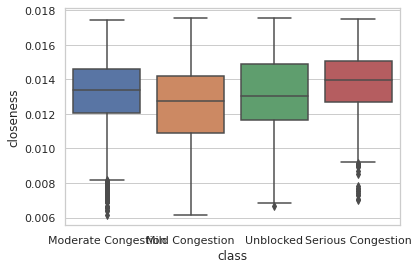

In [18]:
sns.boxplot(x="class", y="closeness", data=df2);

From this figure, it can be seen that the average closeness centrality of the remaining three classes, except the unblocked class, increases with the level of congestion. We believe that the reason for the anomaly in the degree centrality of unblocked is that we remove more nodes located in the "suburbs" in the preprocessing stage due to missing values.

From the above graphs, we can see that nodes with higher closeness centrality are more likely to be classified into Serious congestion. Since high value areas of closeness centrality tend to be concentrated at the center of mass of the network<sup>[4]</sup>, and nodes with high closeness centrality in the road network tend to be closer to urban areas and more congested. This is consistent with our findings.

### Eigenvector Centrality

Eigenvector centrality considers that the importance of a node depends both on the number of its token nodes and on the importance of its neighboring nodes.
$$
x_{v}=\frac{1}{\lambda} \sum_{t \in M(v)} x_{t}=\frac{1}{\lambda} \sum_{t \in G} a_{v, t} x_{t}
$$

(array([2.193e+04, 8.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 7.000e+00]),
 array([1.74045581e-29, 6.30070024e-02, 1.26014005e-01, 1.89021007e-01,
        2.52028010e-01, 3.15035012e-01, 3.78042014e-01]),
 <a list of 6 Patch objects>)

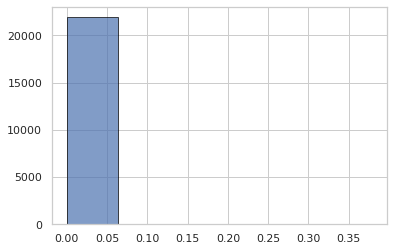

In [19]:
plt.hist(df2['vector'], bins=6, edgecolor="black", alpha=0.7)

This figure shows that the Eigenvector centrality of almost all the waypoints is concentrated in the range of 0-0.05

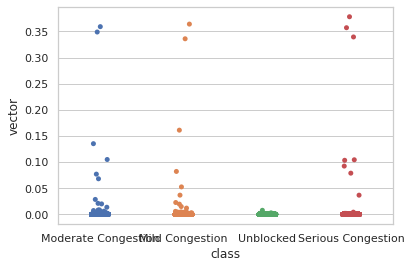

In [20]:
sns.set(style="whitegrid")
sns.stripplot(x="class",y="vector", data=df2)
plt.show()

This figure shows that the points of Eigenvector centrality in all four congestion classes are concentrated to 0. And the eigenvector centrality of node in unblocked class are more concentrated than others, which means all the node have a Eigenvector centrality around 0.

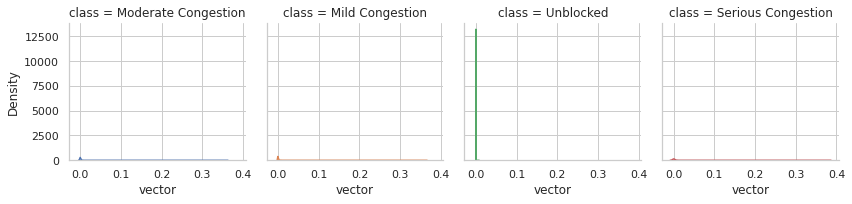

In [21]:
grid = sns.FacetGrid(df2[['vector', 'class']], col='class', hue='class', col_wrap=4)
grid.map(sns.distplot, 'vector')

Except for the unblocked class, we can see that the the other three classes are distributed in the interval of 0-0.4. And also, since the distribution of unblocked classes is relatively concentrated, only it has more significant values around 0.

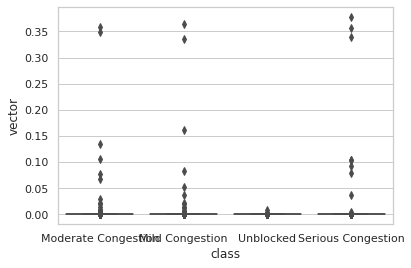

In [22]:
sns.boxplot(x="class", y="vector", data=df2);

From this figure, it can be seen that the mean values of the eigenvector centrality for all four classifications are close to zero. And all classes except unblocked class have particularly significant outliers

Eigenvector centrality also describes the importance of a node. Unlike degree centrality, it takes into account the degree of neighboring nodes.However, according to the analysis of degree centrality above, the contribution of a single node to the whole network is obviously small due to the large number of nodes in the graph and the low degree of each node.  Therefore, even considering the neighboring nodes, the eigenvector centrality can hardly describe the effect of individual nodes on the speed in our network, so we consider that there is no relationship between eigenvector centrality and speed. As for the generation of outliers, we speculate that there are very few nodes that have multiple (>4) nodes connected to them, and when this node is considered, outliers are easily generated. According to the analysis in degree centrality, congestion tends to occur in nodes with a higher degree. This explains why there are no outliers in the unblocked class.


### Correlation

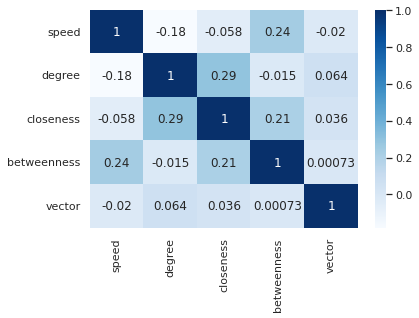

In [23]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

The graph shows that speed and betweenness are positively correlated with a correlation coefficient of 0.24, since betweenness reflects whether a node is a "bridge" or not. This is consistent with our view that "bridges" tend to be suburban roads, and "bridges" tend to be "open". Speed is negatively correlated with degree, with a correlation coefficient of -0.18. The higher the degree of a node, the more likely it is to be a "junction". Speed is negatively correlated with closeness, with a correlation coefficient of -0.058. The higher the closeness of a node, the more likely it is to be a "junction". The higher the closeness of a node, the closer it is to urban area, and the more likely it is to be congested. Therefore, the higher the closeness, the lower the traffic speed. The correlation coefficient of vector is approximately equal to 0. This is consistent with our view that vector is not related to traffic speed.

## Conclusion

For our exploratory data analysis on road network graphs, we focused on analyzing the differences of the constructed road network graphs under different centrality metrics. We classify the speed data into four classes, Moderate Congestion, Mild Congestion, Unblocked and Serious Congestion, for subsequent statistical observation.

First, we statistics the difference of different speed classes under the degree centrality measure. We found that nodes with high degree centrality tend to be Moderate Congestion and Serious Congestion; nodes with low degree centrality tend to be Mild Congestion and Unblocked, i.e., the higher the degree centrality of a node, the lower its speed is likely to be. In later models, we may label nodes with higher degree centrality as "junctions".

Second, we statistics the differences of different speed classes under the betweenness centrality measure. We found that nodes with higher betweenness centrality tend to have higher speeds. We may label nodes with higher betweenness centrality in subsequent model construction as "bridge".

After that, we statistics the difference between different speed classes under the closeness centrality measure. We found that the higher the closeness centrality of a node, the lower its speed is likely to be. We may label nodes with higher closeness centrality in subsequent model construction as "urban".

Finally, we statistics the differences between different speed classes under the eigenvector centrality measure. We found that eigenvector centrality is difficult to describe the effect of nodes in our road network on speed, so we do not intend to do subsequent operations for the difference in eigenvector.

Next, we correlated the statistical results. The result of the correlation is consistent with our idea.

For the subsequent model building, we may choose the GNN+LSTM model. Since our data is based on graph data, which is not in Euclidean space, the graph cannot be represented by any coordinate system that we are familiar with. Further, our road network graph is a giant graph containing more than 20,000 nodes with very high latitude and dense node distribution, which is difficult to be understood by general neural networks, so we chose GNN for graph data for modeling. The reason for our choice of LSTM is because GNN has a short-term memory problem<sup>[5]</sup> and cannot handle longer input sequences, and the temporal data is also a very important component in our data, so we plan to use the GNN+LSTM model for modeling.

## Reference

[1] Abaya, Ernesto B., et al. Instantaneous Fuel Consumption Models of Light Duty Vehicles and a Case Study on the Fuel Consumption at Different Traffic Conditions in Metro Manila Using Shepard’s Interpolation Method. No. 2018-01-0075. SAE Technical Paper, 2018.

[2] Tomko M, Winter S, Claramunt C. Experiential Hieranrchies of Streets [J]. Computers Environmnet and Urban Systems, 2008, 32(1): 41-52.

[3] Jayaweera, I. M. L. N., Perera, K. K. K. R., & Munasinghe, J. (2017). Centrality measures to identify traffic congestion on road networks: A case study of sri lanka. IOSR Journal of Mathematics (IOSRJM).

[4]	Crucitti P, Latora V, Porta S. Centrality in networks of urban streets[J]. Chaos:An Interdisciplinary Journal of Nonlinear Science, 2006, 16(1): 015113 DOI:10.1063/1.2150162.

[5] Wu, Z., Pan, S., Chen, F., Long, G., Zhang, C., & Philip, S. Y. (2020). A comprehensive survey on graph neural networks. IEEE transactions on neural networks and learning systems, 32(1), 4-24.